 # Data preprocessing
 
  1. Preprocessing Data for Machine Learning

Hello! Welcome to this course on Preprocessing Data for Machine Learning. My name is Sarah Guido, and I'll be helping you learn the skills necessary for preparing data for modeling. Let's jump right in.
2. What is data preprocessing?

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.
3. Refresher on Pandas basics

I'm going to walk through some basics in Pandas. Most of this should be review. If it isn't, go check out other courses related to Pandas. We're going to be working with some pretty straightforward files in this course. The important line here is the `hiking.head()` line. The first thing you're going to want to do with any dataset is look at it.
4. Refresher on Pandas basics

It's useful to be able to generate a list of the features present in your dataset. You can easily see the columns in a dataset with the columns attribute, and you can see their data type with the dtype attribute.
5. Refresher on Pandas basics

Finally, you can quickly generate some basic stats about a dataframe like the mean, standard deviation, and quartiles using the describe method. One of the first steps you can take to preprocess your data is to remove missing data. There's a lot of ways to deal with missing data, but here we're only going to cover ways to remove either columns or rows with missing data.
6. Removing missing data

If you wanted to drop all rows from a dataframe that contain missing values, you can do that with dropna.
7. Removing missing data

You can drop specific rows by passing index labels to the drop function, which defaults to dropping rows.
8. Removing missing data

Usually you'll want to focus on dropping a particular column, especially if all or most of its values are missing. You can use the drop method as well, though the parameters are different. The first parameter is the column name, in this case A. We have to specify axis=1 in order to designate that we want to drop a column.
9. Removing missing data

What if we want to drop rows where data is missing in a particular column? We can do this with the help of boolean indexing, which is a way to filter a dataframe based on certain values. Instead of indexing a dataframe using column or row names, you can set a condition to filter your dataframe by to return a specific set of data. For example, if we wanted only rows in this dataframe where column B is equal to 7, we can filter it by selecting where column B is equal to 7.
10. Removing missing data

First, let's take a look at how many null values we have in column B, using isnull to get null values and then using sum to output a count. So we have 2 missing values. To filter those out, we can simply use the notnull method on column B as a boolean index. This will return a dataframe where all rows have a non null value for column B. 

In [8]:
import pandas  as pd 
import glob
import pandas as pd 
import os 
import pylint
from unidecode import unidecode
import numpy as np 
from tqdm import trange, tqdm
import gc 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/volunteer_opportunities.csv')
df.shape

(665, 35)

# EDA 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
opportunity_id        665 non-null int64
content_id            665 non-null int64
vol_requests          665 non-null int64
event_time            665 non-null int64
title                 665 non-null object
hits                  665 non-null int64
summary               665 non-null object
is_priority           62 non-null object
category_id           617 non-null float64
category_desc         617 non-null object
amsl                  0 non-null float64
amsl_unit             0 non-null float64
org_title             665 non-null object
org_content_id        665 non-null int64
addresses_count       665 non-null int64
locality              595 non-null object
region                665 non-null object
postalcode            659 non-null float64
primary_loc           0 non-null float64
display_url           665 non-null object
recurrence_type       665 non-null object
hours                 

In [12]:
df.head(2)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,opportunity_id,content_id,vol_requests,event_time,hits,category_id,amsl,amsl_unit,org_content_id,addresses_count,...,primary_loc,hours,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
count,665.000000,665.000000,665.000000,665.0,665.000000,617.000000,0.0,0.0,665.000000,665.000000,...,0.0,665.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5374.454135,42790.643609,78.778947,0.0,345.409023,2.105348,NaN,NaN,20752.207519,1.046617,...,NaN,0.027068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,234.322154,5491.720274,569.763773,0.0,530.716526,1.412003,NaN,NaN,19143.034346,0.537109,...,NaN,0.519952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4952.000000,36697.000000,1.000000,0.0,0.000000,1.000000,NaN,NaN,24.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5175.000000,38414.000000,3.000000,0.0,102.000000,1.000000,NaN,NaN,2138.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5377.000000,40222.000000,12.000000,0.0,204.000000,2.000000,NaN,NaN,4442.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5580.000000,49308.000000,30.000000,0.0,374.000000,3.000000,NaN,NaN,39189.000000,1.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5782.000000,52894.000000,9999.000000,0.0,4662.000000,6.000000,NaN,NaN,52858.000000,12.000000,...,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Bad key savefig.frameon in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

<AxesSubplot:>

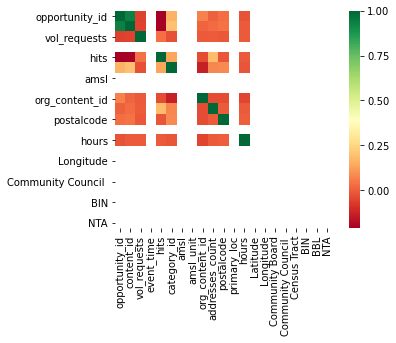

In [5]:
import seaborn as sns 
warnings.filterwarnings("ignore")
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


In [11]:
volunteer= df.copy()
volunteer.dropna(axis = 1, thresh = 3).shape

(665, 24)

A lot of operations are done on a column basis, so it's useful to remember axis=1 when working with Pandas.

In [13]:
# Check how many values are missing in the category_desc column
print(volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

48
(617, 35)


# Working with data types

*Exploring data types

Taking another look at the dataset comprised of volunteer information from New York City, we want to know what types we'll be working with as we start to do more preprocessing.

Which data types are present in the volunteer dataset?

    The dataset volunteer has been provided.
    Use the .dtypes attribute to check the datatypes.


Exploring data types

Taking another look at the dataset comprised of volunteer information from New York City, we want to know what types we'll be working with as we start to do more preprocessing.

Which data types are present in the volunteer dataset?

    The dataset volunteer has been provided.
    Use the .dtypes attribute to check the datatypes.


In [15]:
volunteer.dtypes

opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BIN                   float64
BBL       

In [16]:
# Print the head of the hits column
print(volunteer["hits"].head())

# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype('int')

# Look at the dtypes of the dataset
print(volunteer.dtypes)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64


# Class distribution

1. Training and Test Sets

One of the most necessary steps for preprocessing, which you should be familiar with if you've taken other courses on Python and machine learning, is splitting up your data into training and test sets. We do this to avoid the issue of overfitting. If we train a model on our entire set of data, we won't have any way to test and validate our model because the model will essentially know the dataset by heart. Holding out a test set allows us to preserve some data the model hasn't seen yet.
2. Splitting up your dataset

Just to review, this is how you split up your dataset in scikit learn using the train_test_split function. This should look familiar to you. The function shuffles up your dataset and then randomly splits it. By default, the function will split 75% of the data into the training set and 25% into the test set. In many scenarios, the default splitting parameters will work well. However, if your labels have an uneven distribution, your test and training sets might not be representative samples of your dataset and could bias the model you're trying to train. For example, if you look at the example training and test datasets on this slide, you can see that the training set has only samples labeled n, while there is a y label in the test set.
3. Stratified sampling

A good technique for sampling more accurately when you have imbalanced classes is stratified sampling, which is a way of sampling that takes into account the distribution of classes or features in your dataset. So for example, let's say we had a dataset with 100 samples, 80 of which are class 1 and 20 of which are class 2. We want the class distribution in both our training set and our test set to reflect this, so in both our training and test sets, we'd want 80% of our sample to be class 1 and 20% to be class 2, which means we'd want 60 class 1 samples and 15 class 2 samples in our training set of 75 samples. In our test set of 25 samples, we want to have 20 class 1 samples and 5 of class 2. This is on par with the distribution of classes in the original dataset.
4. Stratified sampling

There's a really easy way to do this in scikit learn using the train test split function. The function comes with a stratify parameter, and to stratify according to class labels, just pass in your y dataset to that parameter. So here we have our 100 labels, 80 are class1 and 20 are class 2. let's run train_test_split, and pass the y labels dataset into that stratify parameter.
5. Stratified sampling

If we check the distribution of classes for our training and test labels, you can see the distribution of classes is in accordance with the original y class distribution

# Class imbalance

In the volunteer dataset, we're thinking about trying to predict the category_desc variable using the other features in the dataset. First, though, we need to know what the class distribution (and imbalance) is for that label.

Which descriptions occur less than 50 times in the volunteer dataset?

    The dataset volunteer has been provided.
    The colum you want to check is category_desc.
    Use the value_counts() method to check variable cou

In [17]:
volunteer.category_desc.value_counts()

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Strengthening Communities'),
  Text(1, 0, 'Environment'),
  Text(2, 0, 'Helping Neighbors in Need'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'Emergency Preparedness')])

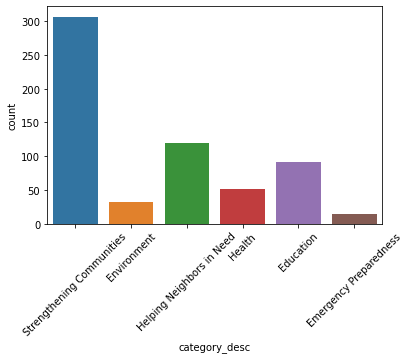

In [21]:
import matplotlib.pyplot as plt
g= sns.countplot(x='category_desc', data=volunteer)
plt.xticks(rotation=45)

In [63]:
# Create a data with all columns except category_desc
volunteer = volunteer[volunteer['category_desc'].notnull()]


# Create a data with all columns except category_desc
volunteer_X = volunteer.drop("category_desc", axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[["category_desc"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify=volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train["category_desc"].value_counts())

Strengthening Communities    230
Helping Neighbors in Need     89
Education                     69
Health                        39
Environment                   24
Emergency Preparedness        11
Name: category_desc, dtype: int64


# Standardizing Data
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

 Standardization is a preprocessing task performed on numerical, continuous data.

# Modeling without normalizing

Let's take a look at what might happen to your model's accuracy if you try to model data without doing some sort of standardization first. Here we have a subset of the wine dataset. One of the columns, Proline, has an extremely high variance compared to the other columns. This is an example of where a technique like log normalization would come in handy, which you'll learn about in the next section.

The scikit-learn model training process should be familiar to you at this point, so we won't go too in-depth with it. You already have a k-nearest neighbors model available (knn) as well as the X and y sets you need to fit and score on.

In [98]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/wine_types.csv')
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#### Create the encoder.
# Create arrays for the features and the response variable
y = df['Type'].to_numpy()
X = df.drop('Type', axis=1).to_numpy()

In [41]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6444444444444445


#You can see that the accuracy score is pretty low. Let's explore methods to improve this score.

# Log normalization
Transformation
Normally distributed features are an assumption in Statistical algorithms. Deep learning & Regression-type algorithms also benefit from normally distributed data.
Transformation is required to treat the skewed features and make them normally distributed. Right skewed features can be transformed to normality with Square Root/ Cube Root/ **Logarithm transformation.**

In [44]:
df.var()

Type                                0.600679
Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

In [43]:
df.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


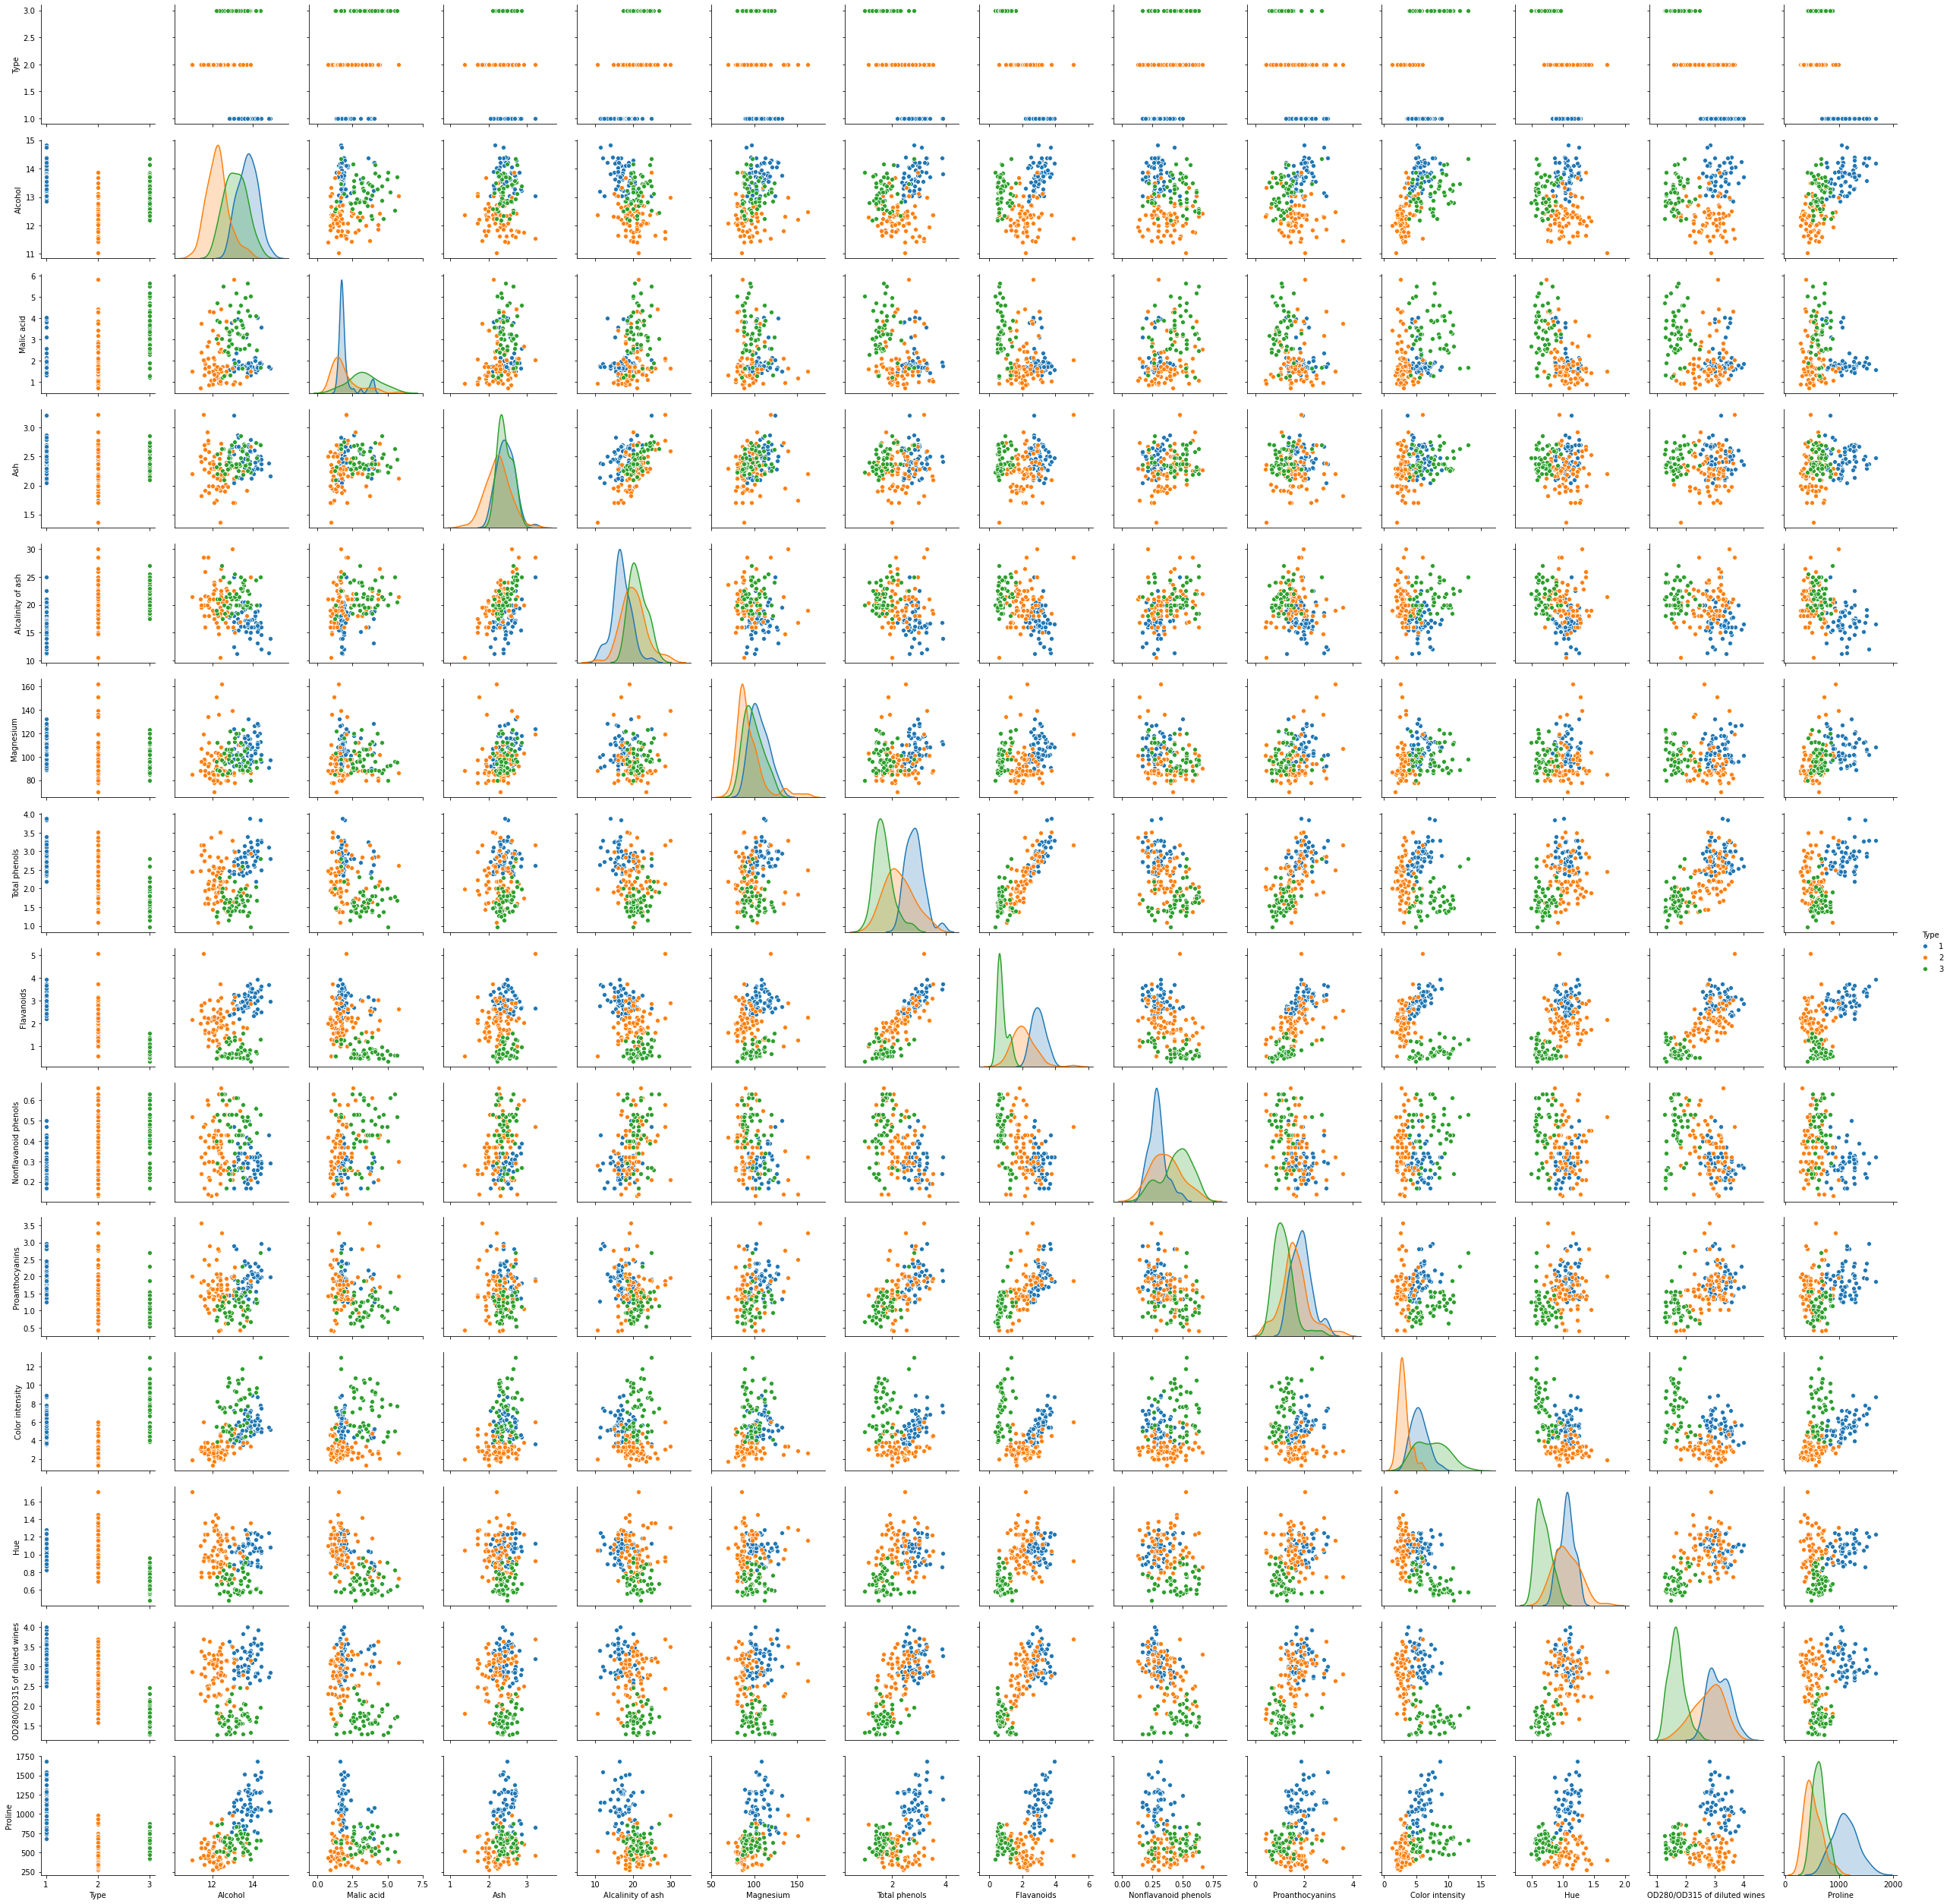

In [45]:
import seaborn as sns 
warnings.filterwarnings("ignore")

sns.pairplot(df, hue= 'Type')

Effect of log transformation on skewed target feature(case of regression): log transformation may treat the skewed feature to normality. And, if our target feature is normally distributed, the algorithm will give equal importance to all the samples. Its also called homoscedasticity. It’s equivalent to treating the imbalanced data problem in categorical target feature like we have in our given dataset. So it’s good to have a normally distributed target feature.
Effect of log transformation on the skewed independent feature: log transformation may bring the independent feature to normality like above where AMT_CREDIT is nearly normal distributed after log. But it may not improve the relationship between the target and the independent features. So, treating independent skewed features may or may not benefit modelling accuracy, it all depends on the original causal relationship between the two.

TL;DR

Log Transformer

Helps with skewness
No predetermined range for scaled data
Useful only on non-zero, non-negative data

Min-Max Scaler

Rescales to predetermined range [0–1]
Doesn’t change distribution’s center (doesn’t correct skewness)
Sensitive to outliers

Max Abs Scaler

Rescales to predetermined range [-1–1]
Doesn’t change distribution’s center
Sensitive to outliers

Standard Scaler

Shifts distribution’s mean to 0 & unit variance
No predetermined range
Best to use on data that is approximately normally distributed

Robust Scaler

0 mean & unit variance
Use of quartile ranges makes this less sensitive to (a few) outliers
No predetermined range

Power Transformer

Helps correct skewness
0 mean & unit variance
No predetermined range
Yeo-Johnson or Box-Cox
Box-Cox can only be used on non-negative data

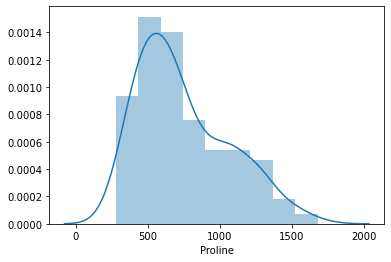

In [50]:
ax = sns.distplot(df["Proline"])

# Log normalization in Python

Now that we know that the Proline column in our wine dataset has a large amount of variance, let's log normalize it.

Numpy has been imported as np in your workspace.

This being said, scaling in statistics usually means a linear transformation of the form f(x)=ax+b.

**Normalizing** can either mean applying a transformation so that you transformed data is roughly normally distributed, but it can also simply mean putting different variables on a common scale. 

**Standardizing**, which means subtracting the mean and dividing by the standard deviation, is an example of the later usage. As you may see it's also an example of scaling. An example for the first would be taking the log for lognormal distributed data.

In [53]:
# Print out the variance of the Proline column
print(df['Proline'].var())

# Apply the log normalization function to the Proline column
df['Proline_log'] = np.log(df['Proline'])

# Check the variance of the normalized Proline column
print(df['Proline_log'].var())

99166.71735542436
0.17231366191842012


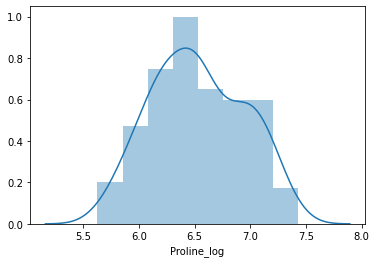

In [54]:
ax = sns.distplot(df['Proline_log'])

# Scaling data for feature comparison

In [55]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()
# Take a subset of the DataFrame you want to scale 
wine_subset = df[['Ash', 'Alcalinity of ash', 'Magnesium']]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

# KNN on non-scaled data

Let's first take a look at the accuracy of a K-nearest neighbors model on the wine dataset without standardizing the data. The knn model as well as the X and y data and labels sets have been created already. Most of this process of creating models in scikit-learn should look familiar to you.

In [56]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)
# Score the model on the test data
print(knn.score(X_test, y_test))

0.7333333333333333


In [57]:
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled =ss.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.9777777777777777


#  Feature engineering

In this chapter, we're going to talk about a very important part of the preprocessing workflow: feature engineering.
2. What is feature engineering?

Feature engineering is the creation of new features based on existing features, and it adds information to your dataset that is useful in some way: it adds features useful for your prediction or clustering task, or it sheds insight into relationships between features. Real world data is often not neat and tidy, and in addition to preprocessing steps like standardization, you'll likely have to extract and expand information that exists in the columns in your dataset. Feature engineering is a subject that could definitely be given its own entire course, so we're just going to go over some basics in this chapter. There are automated ways to create new features, but for now we're going to cover manual methods of feature engineering. These methods require you to have an in-depth knowledge of the dataset that you're working with. Feature engineering is also something that is very dependent on the particular dataset you're analyzing. The goal for this chapter is to demonstrate some scenarios in which feature engineering is useful, but it is by no means comprehensive of all feature engineering methods. It really depends on the dataset you're working with and the model you're building.
3. Feature engineering scenarios

There are a variety of scenarios in which you might want to engineer features from existing data. An extremely common one is with text data. For example, if you're building some kind of natural language processing model, you'll have to create a vector of the words in your dataset. Another scenario might also be related to string data: maybe you have a column which records people's favorite colors. In order to feed this information into a model in scikit-learn, you'll have to encode this information numerically.
4. Feature engineering scenarios

Another common example is with timestamps. You might see a full timestamp that includes the time down to the second or millisecond, which might be much too granular for a prediction task, so you'll want to create a new column with the day or the month. Perhaps a column contains a list of some kind: test scores, or running times, and maybe it's more useful to use an average. These are all examples of situations in which you want to generate new features from existing columns. 
example 
Timestamps can be broken into days or months, and headlines can be used for natural language processin
https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27

https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2

In [58]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/volunteer_opportunities.csv')
df.shape

(665, 35)

In [59]:
df.head()

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Identifying areas for feature engineering

Take an exploratory look at the volunteer dataset, using the variable of that name. Which of the following columns would you want to perform a feature engineering task on?
Possible Answers

    vol_requests
    title
    created_date
    category_desc
   =>> 2, 3, and 4

# Encoding categorical variables

In [ ]:
hikikng  =[{"Prop_ID":"B057","Name":"Salt Marsh Nature Trail","Location":"Enter behind the Salt Marsh Nature Center, located near the intersection of East 33rd Street and Avenue U.","Park_Name":"Marine Park","Length":"0.8 miles","Difficulty":null,"Other_Details":"<p>The first half of this mile-long trail follows the shore of Gerritsen Beach, which empties into Jamaica Bay. The trail&rsquo;s second leg winds through a prairie of tall grass, where you can sometimes spot cottontail rabbits and ring-necked pheasants. Check out our <a href=\"\/park-features\/hiking\/marine-park\">Marine Park Trails<\/a> page for a map and directions to scenic locations, and comfort stations and maps are also available inside the Salt Marsh Nature Center.<\/p>","Accessible":"Y","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"B073","Name":"Lullwater","Location":"Enter Park at Lincoln Road and Ocean Avenue entrance.  Trails begin or are near the Prospect Park Audubon Center.","Park_Name":"Prospect Park","Length":"1.0 mile","Difficulty":"Easy","Other_Details":"Explore the Lullwater to see how nature thrives in the heart of Brooklyn.  The Lullwater is a great place to see birds and other wildlife.  Bathrooms, caf&eacute; and trail guides are available at the Prospect Park Audubon Center.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"B073","Name":"Midwood","Location":"Enter Park at Lincoln Road and Ocean Avenue entrance. Trails begin or are near the Prospect Park Audubon Center.","Park_Name":"Prospect Park","Length":"0.75 miles","Difficulty":"Easy","Other_Details":"Step back in time with a walk through Brooklyn&rsquo;s oldest remaining forest. The Midwood, home to some of Prospect Park&rsquo;s largest trees, is a relic of Brooklyn&rsquo;s history, and was preserved and incorporated into the park during its original construction. The thirty-minute hike loops from Prospect Park&rsquo;s Audubon Center through a forest filled with birds and other animals.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"B073","Name":"Peninsula","Location":"Enter Park at Lincoln Road and Ocean Avenue entrance.  Trails begin or are near the Prospect Park Audubon Center.","Park_Name":"Prospect Park","Length":"0.5 miles","Difficulty":"Easy","Other_Details":"Discover how the Peninsula has changed over the last 300 years.  The Peninsula's restored landscapes provide scenic views, a home for Park wildlife, and great fishing.  Bathrooms, caf&eacute; and trail guides are available at the Prospect Park Audubon Center.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"B073","Name":"Waterfall","Location":"Enter Park at Lincoln Road and Ocean Avenue entrance.  Trails begin or are near the Prospect Park Audubon Center.","Park_Name":"Prospect Park","Length":"0.5 miles","Difficulty":"Easy","Other_Details":"Trace the source of the Lake on the Waterfall trail.  The Fallkill Falls is the first of six waterfalls that you will see along the Park's watercourse.  Bathrooms, caf&eacute; and trail guides are available at the Prospect Park Audubon Center.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"Q001","Name":"Alley Pond Trails","Location":"Park-wide. Check out our <a href=\"\/park-features\/hiking\/alley-pond\">Alley Pond Park Trails<\/a> page for a map and directions to scenic locations.","Park_Name":"Alley Pond Park","Length":"Various","Difficulty":"Various","Other_Details":"Numerous trails wind through native hardwood (oak-hickory) forest and kettle ponds.  The north end of the park boasts splendid salt marsh views.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"Q015","Name":"Blue Trail","Location":"Forest Park Drive East, off of Woodhaven Boulevard","Park_Name":"Forest Park","Length":"1.7 miles","Difficulty":"","Other_Details":"Forest Park's numerous trails wind through native hardwood (oak-hickory) forest and kettle ponds.  ","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"Q015","Name":"Orange Trail","Location":"Memorial Drive and Forest Park Drive East","Park_Name":"Forest Park","Length":"2.4 miles","Difficulty":null,"Other_Details":"This trail will lead you through a 2.4 mile adventurous hike along the perimeter of the forest","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"Q015","Name":"Yellow Trail","Location":"Metropolitan Avenue & Forest Park Drive East","Park_Name":"Forest Park","Length":"1.0 mile","Difficulty":"","Other_Details":"","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"Q021","Name":"South Preserve Trail","Location":"Francis Lewis Boulevard and Union Turnpike","Park_Name":"Cunningham Park","Length":"3.0 miles","Difficulty":null,"Other_Details":"Numerous unnamed trails wind through native hardwood (oak-hickory) forest, which features a diverse ecosystem to support abundant wildlife. The parks&rsquo; Kettle Ponds feature the sounds of Spring Peepers and other species of frogs throughout the spring and summer season.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R013","Name":"Greenbelt Blue Trail (Southern Trailhead)","Location":"Brielle Avenue & Roanoake Street","Park_Name":"La Tourette Parks & Golf Course","Length":"12.3 miles","Difficulty":"Easy\/Moderate","Other_Details":"This is the Greenbelt&rsquo;s longest marked trail.  Its northeastern trailhead at the Greenbelt&rsquo;s Deere Park can be accessed from Staten Island Boulevard.  Walk the trail to its end, near the Brielle Avenue-Roanoake Street intersection in Willowbrook, and you will either pass through or have a view of each of the Greenbelt&rsquo;s five distinct vegetation zones.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R013","Name":"Greenbelt Nature Center Trail","Location":"Rockland & Brielle avenues","Park_Name":"La Tourette Parks & Golf Course","Length":"0.85 miles","Difficulty":"Easy","Other_Details":"This gentle walk takes you through a forest of red maple, black birch, cherry, tulip, and sassafras trees.  In the understory, there is an abundance of spicebush, which produces bright red berries in the fall.  The trail connects to the blue trail and the white trail.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R013","Name":"Greenbelt Red Trail","Location":"Richmond Road and St. Patrick's Place","Park_Name":"La Tourette Parks & Golf Course","Length":"4.0 miles","Difficulty":"Easy\/Moderate","Other_Details":"This loop trail is in the heart of the Greenbelt, which is also home to six other picturesque hiking trails on which urban explorers can discover Staten Island&rsquo;s vast preserves of natural spaces. The red trail crosses over Buck&rsquo;s Hollow, Heyerdahl Hill, the northern edge of LaTourette golf course and the neighborhood of Lighthouse Hill. Want to make a full day of it&Alpha; A pathway leads from the trail downhill to Historic Richmond Town, where you can walk through a preserved 18th century village.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R013","Name":"Greenbelt White Trail (Southern)","Location":"Rockland Avenue near Brielle Avenue (mid-way trailhead) or Richmond Road near Reidel Avenue","Park_Name":"La Tourette Parks & Golf Course","Length":"7.6 miles","Difficulty":"Easy\/Moderate","Other_Details":"Connects to Great Kills Park of the Gateway National Park System Service.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R013","Name":"Greenbelt Yellow Trail (Southwest Trailhead)","Location":"Richmond Avenue & Forest Hill Road","Park_Name":"La Tourette Parks & Golf Course","Length":"8.0 miles","Difficulty":"Moderate\/Difficult","Other_Details":"Traverses the entire Greenbelt from its Northeast corner in the community of Todt Hill to its Southwest corner in  New Springville; access Moses' Mountain at Rockland Avenue and Manor Road behind bus stop.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R017","Name":"William T. Davis Wildlife Refuge Pink Trail","Location":"Mulberry Avenue off Travis Avenue (limited parking)","Park_Name":"William T. Davis Wildlife Refuge","Length":"0.5 miles","Difficulty":"Easy","Other_Details":"Excellent birdwatching location; abounds with water-loving trees such as sweet gum and ash.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R030","Name":"Willowbrook Park White Trail","Location":"Willowbrook Park off Victory Boulevard","Park_Name":"Willowbrook Park","Length":"7.6 miles","Difficulty":"Easy\/Moderate","Other_Details":"Connects to Great Kills Park of the Gateway National Park System Service.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R088","Name":"Gretta Moulton Trail\/Green Trail","Location":"200 feet ahead of parking lot at the terminus of Nevada Avenue","Park_Name":"High Rock Park","Length":"0.75 miles","Difficulty":"Moderate","Other_Details":"The trail head of this circular trail is off the High Rock Park access road near the Nevada Avenue entrance.  The hike takes you along kettle ponds and knobs, formations characteristic of terminal moraine topography.  The upland forest includes a patch of persimmon trees.  The trail is also known as the Gretta Moulton Trail in honor of an ardent Greenbelt supporter.  Bathrooms nearby.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R088","Name":"High Rock Park Lavender Trail","Location":"200 feet ahead of parking lot at the terminus of Nevada Avenue","Park_Name":"High Rock Park","Length":"0.25 miles","Difficulty":"Easy","Other_Details":"Jewelweed, skunk cabbage, and various grasses and water plants can be seen, along with black water snakes, snapping turtles, and spring peepers.  Bathrooms nearby.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},
      {"Prop_ID":"R115","Name":"Deere Park Blue Trail","Location":"Staten Island Boulevard","Park_Name":"Deere Park","Length":"12.3 miles","Difficulty":"Easy\/Moderate","Other_Details":"This is the Greenbelt&rsquo;s longest marked trail.  Its northeastern trailhead at the Greenbelt&rsquo;s Deere Park can be accessed from Staten Island Boulevard.  Walk the trail to its end, near the Brielle Avenue-Roanoake Street intersection in Willowbrook, and you will either pass through or have a view of each of the Greenbelt&rsquo;s five distinct vegetation zones.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X092","Name":"Cass Gallagher Nature Trail","Location":"A short walk in from the intersection of Broadway and Mosholu Avenue, near the horse stables","Park_Name":"Van Cortlandt Park","Length":"1.4 miles","Difficulty":"Moderate\/Difficult","Other_Details":"","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X092","Name":"John Kieran Trail","Location":"Enter at Golf Course via Van Cortlandt Park South and Bailey Avenue.","Park_Name":"Van Cortlandt Park","Length":"1.25 miles","Difficulty":"Easy","Other_Details":"Maps are available at the Van Cortlandt Nature Center. Named in 1988 for the famed naturalist and newspaperman, this trail journeys through the park's lake area and freshwater wetlands, passing Tibbet's Brook via a wooden bridge perfect for birding, and forms a loop with the Parade Ground.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X092","Name":"John Muir Trail","Location":"Enter either at Broadway & Mosholu Avenue or Van Cortlandt Park East & Oneida Avenue.","Park_Name":"Van Cortlandt Park","Length":"1.5 miles","Difficulty":"Moderate","Other_Details":"Travel through three ecologically distinct forests on this 1.5 mile route, the only trail in Van Cortlandt Park to traverse the park from east to west. The trail will lead you through park's Northeast Forest, home to red oak, sweetgum, and tulip trees, as well as a frog-filled marsh; the Croton Woods and its sugar maple and hickory trees, as well as the Old Croton Aqueduct; and the hilly Northwest Forest, home to stately tulip, oak, and hickory trees.","Accessible":"N","Limited_Access":"Y","lat":null,"lon":null},{"Prop_ID":"X092","Name":"Old Croton Aqueduct Trail","Location":"Enter Trail at either Dickinson Avenue & Van Cortlandt Park South or Mosholu Parkway & West Gun Hill Road. ","Park_Name":"Van Cortlandt Park","Length":"1.1 mile","Difficulty":"Easy\/Moderate","Other_Details":"[Trail renovations will begin soon. Please bear with us as we correct erosion and rebuild paths.] This segment is part of the 41-mile-long aqueduct that brought water from the Croton Dam to New York City in the 1800s.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X092","Name":"Putnam Trail","Location":"Enter the park at Van Cortlandt Park South and Bailey Avenue.","Park_Name":"Van Cortlandt Park","Length":"1.5 miles","Difficulty":"Easy ","Other_Details":"This section of the 15-mile trail that runs up to Brewster, NY may be accessed by the Van Cortlandt Golf Course parking lot.  Native hardwood (oak-hickory) forest, historically significant route (former railroad route that ran through the park into the 1980s!)","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R120","Name":"Arden Woods Trail","Location":"Arden & Legate Avenue","Park_Name":"Arden Woods","Length":"1.2 miles","Difficulty":"Easy","Other_Details":null,"Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R031","Name":"Wolfe's Pond Trail","Location":"Hylan Boulevard & Cornelia Avenue","Park_Name":"Wolfes Pond Park","Length":"0.75 miles","Difficulty":"Easy","Other_Details":"Both hikers and mountain bikers can explore miles of trails in this south shore location. Trails contain easy, moderate, and difficult terrain.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R027","Name":"Long Pond Trail","Location":"Page Avenue & Eugene Street","Park_Name":"Long Pond Park","Length":"1.5 miles","Difficulty":"Easy","Other_Details":null,"Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R005","Name":"Clove Lakes Park Trail","Location":"Victory Boulevard","Park_Name":"Clove Lakes Park","Length":"3.0 miles","Difficulty":"Easy","Other_Details":"Visitors can enjoy walks by its valley lakes, ascend pathways through wooded hills, pause along its picturesque bridges, or visit New York City&rsquo;s largest tulip tree.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X039","Name":"Kazimiroff Trail","Location":"Hunter Island","Park_Name":"Pelham Bay Park","Length":null,"Difficulty":null,"Other_Details":"Leave the city far behind on the Kazimiroff Nature Trail, which provides self-guided long and short loop paths around 189-acre Hunter Island, leading visitors along the island&rsquo;s wetland border, through its interior forest, and onto the shore of beautiful Orchard Beach.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"M042","Name":"Inwood Hill Park Hiking Trail","Location":"Check out our <a href=\"\/park-features\/hiking\/inwood-hill-park\">Inwood Hill Trails<\/a> page for a map featuring entrances and directions to scenic locations.","Park_Name":"Inwood Hill Park","Length":null,"Difficulty":"Moderate","Other_Details":"Take a step back in time and imagine Manhattan as a forest grove of tulip trees, oaks, and maples. Inwood Hill Park&#39;s marked scenic sites or historic highlights trail will lead you to the top of the hill, where the park&#39;s oldest trees&mdash;two Cottonwoods planted before the park was established&mdash;still live.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"X002","Name":"Bronx River Forest Trail","Location":"Enter at East Gun Hill Road for Red Trail and Burke Avenue or East 204th St. for Blue Trail","Park_Name":"Bronx Park","Length":null,"Difficulty":null,"Other_Details":"<p>The Bronx River Forest trails offer a river respite from the busy Bronx nearby. Check out our <a href=\"\/park-features\/hiking\/bronx-river-forest\">Bronx River Forest Trails<\/a> page for a map and directions to scenic locations.<\/p>","Accessible":"N","Limited_Access":"N","lat":null,"lon":null},{"Prop_ID":"R006","Name":"Conference House Park Trails","Location":"Check out our <a href=\"\/park-features\/hiking\/conference-house-park\">Conference House Park Trails<\/a> page for a map and directions to scenic locations.","Park_Name":"Conference House Park","Length":null,"Difficulty":null,"Other_Details":"The Conference House Blue Trail extends from Shore Road and Satterlee Street all the way south to Brighton Street and Surf Avenue. Along the way, you can see a number of historic buildings, including the famed Conference House, and enjoy beautiful waterfront views of this beachside park.","Accessible":"N","Limited_Access":"N","lat":null,"lon":null}]

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking["Accessible"])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

# Encoding categorical variables - one-hot

One of the columns in the volunteer dataset, category_desc, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use Pandas' get_dummies() function to do so.

In [62]:
# Transform the category_desc column
category_enc = pd.get_dummies(df["category_desc"])

# Take a look at the encoded columns
print(category_enc.head())

   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  


get_dummies() is a simple and quick way to encode categorical variables.

# Engineering numerical features
Engineering numerical features - taking an average

A good use case for taking an aggregate statistic to create a new feature is to take the mean of columns. Here, you have a DataFrame of running times named running_times_5k. For each name in the dataset, take the mean of their 5 run times.


In [ ]:
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)


# Take a look at the results
print(running_times_5k)

In [66]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

  start_date_converted  start_date_month
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2
5           2011-02-12                 2


You can also use attributes like .day to get the day and .year to get the year from datetime columns.
# Text classification
1. Engineering features from text

Though text data is a little more complicated to work with, there's a lot of useful feature engineering you can do with it. One method is to extract the pieces of information that you need: maybe part of a string, or extracting a number, and transforming it into a feature. You can also transform the text itself into features, for use with natural language processing methods or prediction tasks. Let's learn how to extract data from text fields.
2. Extraction

The way we're going to extract from strings is using regular expressions. Regular expressions are patterns that can be used to extract patterns from text data. You should already be familiar with regular expressions from the Cleaning Data in Python course, so this should be review. We're going to only focus on extracting numbers from strings. Here we have a string, and we want to extract the temperature digit from it. Notice that this number is a float. We'll need a pattern to extract this float, so let's break down the pattern in re.compile. "backslash d" means that we want to grab digits, and the "plus" means we want to grab as many as possible. So if there are two next to each other, we want both (like the 75). "backslash period" means we want to grab the decimal point, and then there's another "backslash d plus" at the end to grab the digits on the right-hand side of the decimal. We then search the string for a matching pattern using re.match, and we can extract it using group().
3. Vectorizing text

If you're working with text, you might want to model it in some way. Maybe you want to use document text for classification. In order to do that, we'll need to vectorize the text and transform it into a numerical input that scikit-learn can use. We're going to create a tf/idf vector. tf/idf is a way of vectorizing text that reflects how important a word is in a document beyond how frequently it occurs. It stands for term frequency inverse document frequency and places the weight on words that are ultimately more significant in the entire corpus of words.
4. Vectorizing text

Creating tf/idf vectors is relatively straightforward in scikit-learn, and we can use tf/idf vectorizer to do it. Here we have a collection of text. In order to vectorize it, we can simply pass the column of text we want to vectorize into tfidf vectorizer's fit transform method.
5. Text classification

Now that we have a vectorized version of text, we can use it for classification. We'll use a Naive Bayes classifier, which is based on Bayes' theorem of conditional probability, which you can see here, and performs well on text classification tasks. Naive Bayes treats each feature as independent from the others, which can be a naive assumption, but this works out well on text data. Because each feature is treated independently, this classifier works well on high-dimensional data and is very efficient. 

In [72]:
import json


with open ('/home/abderrazak/ALLINHERE/NLP/Datacamp/hiking.json') as f:
    data = json.load(f)
hiking =pd.read_json('/home/abderrazak/ALLINHERE/NLP/Datacamp/hiking.json')
hiking.head()

,Accessible,Difficulty,Length,Limited_Access,Location,Name,Other_Details,Park_Name,Prop_ID,lat,lon
0,Y,None,0.8 miles,N,"Enter behind the Salt Marsh Nature Center, loc...",Salt Marsh Nature Trail,<p>The first half of this mile-long trail foll...,Marine Park,B057,NaN,NaN
1,N,Easy,1.0 mile,N,Enter Park at Lincoln Road and Ocean Avenue en...,Lullwater,Explore the Lullwater to see how nature thrive...,Prospect Park,B073,NaN,NaN
2,N,Easy,0.75 miles,N,Enter Park at Lincoln Road and Ocean Avenue en...,Midwood,Step back in time with a walk through Brooklyn...,Prospect Park,B073,NaN,NaN
3,N,Easy,0.5 miles,N,Enter Park at Lincoln Road and Ocean Avenue en...,Peninsula,Discover how the Peninsula has changed over th...,Prospect Park,B073,NaN,NaN
4,N,Easy,0.5 miles,N,Enter Park at Lincoln Road and Ocean Avenue en...,Waterfall,Trace the source of the Lake on the Waterfall ...,Prospect Park,B073,NaN,NaN


In [76]:
import re 
hiking["Length"]=hiking["Length"].astype("str")
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    
    # Search the text for matches
    mile = re.match(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row))
print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


**Regular expressions are a useful way to perform text extraction.**

# Engineering features from strings - tf/idf

Let's transform the volunteer dataset's title column into a text vector, to use in a prediction task in the next exercise.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

Scikit-learn provides several methods for text vectorization.

In [84]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.5548387096774193


# Feature selection

1. Feature selection

Once you've settled on a feature set for modeling, it's important to really consider these features. Do you need all of them, and do you know how they will impact your model?
2. What is feature selection?

Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests, but we won't cover those here. Most of the methods we'll cover in this chapter are more on the manual side, because it's important to truly understand your dataset before using it to train a model.
3. When to select features

In this chapter, we'll cover three specific scenarios for feature selection. Sometimes, it helps to git rid of noise in your model. Maybe you have redundant features, like both latitude and longitude and city and state, that are adding noise. Or maybe you have features that are strongly statistically correlated, which breaks the assumptions of certain models and thus impacts model performance. If you're working with text vectors, you'll want to use those tf-idf vectors to determine which set of words to train your model on. And finally, if your feature set is large, it may be beneficial to use dimensionality reduction to combine and reduce the number of features in your dataset in a way that also reduces the overall variance. 

# Removing redundant features
# Selecting relevant features

Now let's identify the redundant columns in the volunteer dataset and perform feature selection on the dataset to return a DataFrame of the relevant features.

For example, if you explore the volunteer dataset in the console, you'll see three features which are related to location: locality, region, and postalcode. They contain repeated information, so it would make sense to keep only one of the features.

There are also features that have gone through the feature engineering process: columns like Education and Emergency Preparedness are a product of encoding the categorical variable category_desc, so category_desc itself is redundant now.

Take a moment to examine the features of volunteer in the console, and try to identify the redundant features.

In [86]:
volunteer.head(2)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,start_date_converted,start_date_month
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-01,2
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-29,1


<AxesSubplot:>

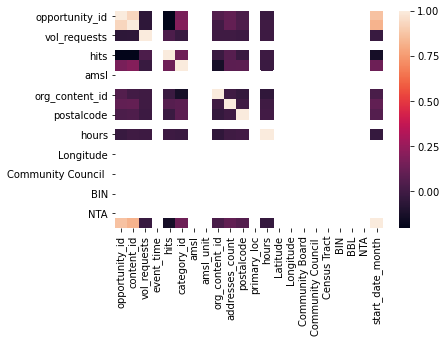

In [87]:
import seaborn as sns 
warnings.filterwarnings("ignore")

sns.heatmap(volunteer.corr())

In [89]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head(2))

   opportunity_id  content_id  event_time  \
1            5008       37036           0   
2            5016       37143           0   

                                           title  hits  \
1                                   Web designer    22   
2  Urban Adventures - Ice Skating at Lasker Rink    62   

                                             summary is_priority  category_id  \
1             Build a website for an Afghan business         NaN          1.0   
2  Please join us and the students from Mott Hall...         NaN          1.0   

   amsl  amsl_unit  ... Latitude  Longitude  Community Board  \
1   NaN        NaN  ...      NaN        NaN              NaN   
2   NaN        NaN  ...      NaN        NaN              NaN   

   Community Council   Census Tract BIN BBL  NTA start_date_converted  \
1                 NaN           NaN NaN NaN  NaN           2011-02-01   
2                 NaN           NaN NaN NaN  NaN           2011-01-29   

  start_date_month  
1          

It's often easier to collect a list of columns to drop, rather than dropping them individually.
# Checking for correlated features

Let's take a look at the wine dataset again, which is made up of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.

In [92]:
# Print out the column correlations of the wine dataset
wine= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/wine_types.csv')

# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)

                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

**Dropping correlated features is often an iterative process, so you may need to try different combinations in your model.**
# Selecting features using text vectors

In [ ]:
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3))

In [ ]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

# Training Naive Bayes with feature selection

Let's re-run the Naive Bayes text classification model we ran at the end of chapter 3, with our selection choices from the previous exercise, on the volunteer dataset's title and category_desc columns.

In [ ]:
# Split the dataset according to the class distribution of category_desc
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(train_X, train_y)

# Print out the model's accuracy
print(nb.score(test_X, test_y))

# Using PCA

Let's apply PCA to the wine dataset, to see if we can get an increase in our model's accuracy.

In [95]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.98098798e-01 1.73593305e-03 9.43282757e-05 4.89438533e-05
 1.04695097e-05 5.60981698e-06 2.79968212e-06 1.44536313e-06
 9.75418873e-07 3.94184513e-07 2.13661389e-07 8.91974959e-08]


In the next section you'll train a model using the PCA-transformed vector.

In [100]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y)

# Fit knn to the training data
knn.fit(X_wine_train, y_wine_train)

# Score knn on the test data and print it out
print(knn.score(X_wine_test, y_wine_test))

0.7777777777777778


# Complete example :
# Dtype

In [103]:
ufo = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/ufo_sightings_large.csv')
# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[["seconds", "date"]].dtypes)

date               object
city               object
state              object
country            object
type               object
seconds           float64
length_of_time     object
desc               object
recorded           object
lat                object
long              float64
dtype: object
seconds           float64
date       datetime64[ns]
dtype: object


# Drop null 

In [104]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 11 columns):
date              4935 non-null datetime64[ns]
city              4926 non-null object
state             4516 non-null object
country           4255 non-null object
type              4776 non-null object
seconds           4935 non-null float64
length_of_time    4792 non-null object
desc              4932 non-null object
recorded          4935 non-null object
lat               4935 non-null object
long              4935 non-null float64
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 424.2+ KB


In [106]:
ufo.shape

(4935, 11)

In [105]:
# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[["length_of_time", "state", "type"]].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo["length_of_time"].notnull() & 
          ufo["state"].notnull() & 
          ufo["type"].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

length_of_time    143
state             419
type              159
dtype: int64
(4283, 11)


# Categorical variables and standardization

In [111]:
def return_minutes(time_string):
    
    # We'll use \d+ to grab digits and match it to the column values
    pattern = re.compile(r"\d+")
        
    # Use match on the pattern and column
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))
ufo["length_of_time"]=ufo["length_of_time"].astype(str)     
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(return_minutes)

# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

    length_of_time  minutes
0          2 weeks      2.0
1           30sec.     30.0
2              nan      NaN
3  about 5 minutes      NaN
4                2      2.0


# Identifying features for standardization

In this section, you'll investigate the variance of columns in the UFO dataset to determine which features should be standardized. After taking a look at the variances of the seconds and minutes column, you'll see that the variance of the seconds column is extremely high. Because seconds and minutes are related to each other (an issue we'll deal with when we select features for modeling), let's log normlize the seconds column.

In [113]:
# Check the variance of the seconds and minutes columns
print(ufo[["seconds", "minutes"]].var())
# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo["seconds"])
ufo["seconds_log"] =ufo["seconds_log"].astype(float)
# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

seconds    3.156735e+10
minutes    8.709933e+02
dtype: float64
nan


# Engineering new features

# Encoding categorical variables

There are couple of columns in the UFO dataset that need to be encoded before they can be modeled through scikit-learn. You'll do that transformation here, using both binary and one-hot encoding methods.

In [114]:
# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val: 1 if val == "us" else 0)

# Print the number of unique type values
print(len(ufo["type"].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo["type"])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

22


In [117]:
# Look at the first 5 rows of the date column
print(ufo["date"].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].dt.month

# Extract the year from the date column
ufo["year"] = ufo["date"].dt.year

# Take a look at the head of all three columns
print(ufo[["date", "month", "year"]].head())

0   2011-11-03 19:21:00
1   2004-10-03 19:05:00
2   2009-09-25 21:00:00
3   2002-11-21 05:45:00
4   2010-08-19 12:55:00
Name: date, dtype: datetime64[ns]
                 date  month  year
0 2011-11-03 19:21:00     11  2011
1 2004-10-03 19:05:00     10  2004
2 2009-09-25 21:00:00      9  2009
3 2002-11-21 05:45:00     11  2002
4 2010-08-19 12:55:00      8  2010


# Text vectorization

Let's transform the desc column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

In [119]:
ufo["desc"]=ufo["desc"].astype(str)
# Take a look at the head of the desc field
print(ufo["desc"].head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(ufo["desc"])

# Look at the number of columns this creates.
print(desc_tfidf.shape)

0    Red blinking objects similar to airplanes or s...
1                 Many fighter jets flying towards UFO
2    Green&#44 red&#44 and blue pulses of light tha...
3    It was a large&#44 triangular shaped flying ob...
4       A white spinning disc in the shape of an oval.
Name: desc, dtype: object
(4935, 6434)


# Feature selection and modeling

# Selecting the ideal dataset

Let's get rid of some of the unnecessary features. Because we have an encoded country column, country_enc, keep it and drop other columns related to location: city, country, lat, long, state.

We have columns related to month and year, so we don't need the date or recorded columns.

We vectorized desc, so we don't need it anymore. For now we'll keep type.

We'll keep seconds_log and drop seconds and minutes.

Let's also get rid of the length_of_time column, which is unnecessary after extracting minutes.

In [120]:
# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[["seconds", "seconds_log", "minutes"]].corr())

# Make a list of features to drop   
to_drop = ["city", "country", "date", "desc", "lat", "length_of_time", "long", "minutes", "recorded", "seconds", "state"]

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis=1)

# Let's also filter some words out of the text vector we created
#filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

              seconds  seconds_log   minutes
seconds      1.000000     0.164613 -0.008161
seconds_log  0.164613     1.000000  0.110072
minutes     -0.008161     0.110072  1.000000


In [122]:
ufo_dropped.columns

Index(['type', 'seconds_log', 'country_enc', 'changing', 'chevron', 'cigar',
       'circle', 'cone', 'cross', 'cylinder', 'diamond', 'disk', 'egg',
       'fireball', 'flash', 'formation', 'light', 'other', 'oval', 'rectangle',
       'sphere', 'teardrop', 'triangle', 'unknown', 'month', 'year'],
      dtype='object')

In [ ]:
X=ufo_dropped['seconds_log', 'changing', 'chevron', 'cigar', 'circle', 'cone',
       'cross', 'cylinder', 'diamond', 'disk', 'egg', 'fireball', 'flash',
       'formation', 'light', 'other', 'oval', 'rectangle', 'sphere',
       'teardrop', 'triangle', 'unknown', 'month', 'year'].astype(float)
y=ufo_dropped['country_enc']

In [ ]:
# Take a look at the features in the X set of data
print(X.columns)

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y)

# Fit knn to the training sets
knn.fit(train_X, train_y)

# Print the score of knn on the test sets
print(knn.score(test_X, test_y))